In [1]:
import pandas as pd
import numpy as np

## A generic bar plot function

In [2]:
def show_bar(df, col):
    ax = df.plot(kind='bar', y=col)

    for p in ax.patches:
        ax.annotate(str(p.get_height()), xy=(p.get_x(), p.get_height()))

# Read the data

In [3]:
df = pd.read_csv('cordis-h2020organizations.csv', sep=';', encoding='utf-8')

## Shape 

In [4]:
df.shape

(82382, 23)

### Columns

In [5]:
df.columns

Index([u'projectRcn', u'projectID', u'projectAcronym', u'role', u'id', u'name',
       u'shortName', u'activityType', u'endOfParticipation', u'ecContribution',
       u'country', u'street', u'city', u'postCode', u'organizationUrl',
       u'contactType', u'contactTitle', u'contactFirstNames',
       u'contactLastNames', u'contactFunction', u'contactTelephoneNumber',
       u'contactFaxNumber', u'contactEmail'],
      dtype='object')

## Looking at the data

- *projectRcn*: unique ID of the project
- *projectAcronym* - the project
- *name* - name of the participant
- *role* - role of the participant
- *country* - iso2 country code


In [6]:
df.head(20)

,projectRcn,projectID,projectAcronym,role,id,name,shortName,activityType,endOfParticipation,ecContribution,...,postCode,organizationUrl,contactType,contactTitle,contactFirstNames,contactLastNames,contactFunction,contactTelephoneNumber,contactFaxNumber,contactEmail
0,197544,671970,WoundCure,coordinator,986601745.0,NICAST LTD,NIC,/PRC,False,2265025,...,71291,www.nicast.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201289,705054,NOFLAME,coordinator,888898380.0,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,MPG,/REC,False,"159460,8",...,80539,www.mpg.de,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,195329,656811,USES,coordinator,999997736.0,AARHUS UNIVERSITET,AU,/HES,False,"212194,8",...,8000,www.au.dk,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,205215,701088,AutoPilot-Dx,participant,935593616.0,TECAN DEUTSCHLAND GMBH,Tecan DE,/PRC,False,370125,...,74564,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,205215,701088,AutoPilot-Dx,coordinator,953712440.0,MEMED DIAGNOSTICS LTD,MEMED,/PRC,False,655025,...,39120,www.me-med.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,205215,701088,AutoPilot-Dx,participant,999987648.0,RUPRECHT-KARLS-UNIVERSITAET HEIDELBERG,UHEI,/HES,False,415625,...,69117,www.uni-heidelberg.de,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,205215,701088,AutoPilot-Dx,participant,999995796.0,UNIVERSITA DEGLI STUDI DI MILANO,UMIL,/HES,True,"26937,5",...,20122,www.unimi.it,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,205215,701088,AutoPilot-Dx,participant,999846319.0,UNIVERSITA DEGLI STUDI DI PERUGIA,UNIPG,/HES,False,"388687,5",...,6123,www.unipg.it,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,205215,701088,AutoPilot-Dx,participant,926288018.0,QUANTIFY RESEARCH AB,Quantify Res,/PRC,False,437500,...,11221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,198301,675680,BlueBRIDGE,participant,999608281.0,FOOD AND AGRICULTURE ORGANIZATION OF THE UNITE...,FAO,/PUB,False,780000,...,153,www.fao.org,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Projects 

In [7]:
df['name'].unique()

array([u'NICAST LTD',
       u'MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISSENSCHAFTEN EV',
       u'AARHUS UNIVERSITET', ...,
       u'IN-VISION DIGITAL IMAGING OPTICS GMBH', u'DESKARTES OY',
       u'INTERNATIONAL SYALONS NEWCASTLE LIMITED'], dtype=object)

## Roles

In [8]:
roles = df.groupby(['role']).agg({'projectID': [('total', 'count'), ('unique', 'nunique')]})
roles.columns = roles.columns.droplevel()
# roles = roles.xs('projectID', axis=1, drop_level=True)
roles

,total,unique
role,,
beneficiary,194,167
coordinator,16869,16716
hostInstitution,1967,1963
participant,58480,6368
partner,4872,1231


In [9]:
show_bar(roles, ['total'])

## Members across projects

In [10]:
members_projects = df.groupby(['projectRcn', 'projectID', 'projectAcronym']) \
.agg({'name': [('total', 'count')]}) \
.sort_values(ascending=False, by=('name', 'total'))

members_projects.columns = ['total']
members_projects = members_projects.reset_index()
members_projects['project_url'] = members_projects.apply(lambda x: "http://cordis.europa.eu/project/rcn/{}_en.html".format(x['projectRcn']), axis=1)


In [11]:
members_projects.head(20)

,projectRcn,projectID,projectAcronym,total,project_url
0,200853,696656,GrapheneCore1,159,http://cordis.europa.eu/project/rcn/200853_en....
1,216122,785219,GrapheneCore2,145,http://cordis.europa.eu/project/rcn/216122_en....
2,205371,720270,HBP SGA1,117,http://cordis.europa.eu/project/rcn/205371_en....
3,210800,737459,Productive4.0,110,http://cordis.europa.eu/project/rcn/210800_en....
4,216096,777536,EOSC-hub,77,http://cordis.europa.eu/project/rcn/216096_en....
5,203396,692455,ENABLE-S3,73,http://cordis.europa.eu/project/rcn/203396_en....
6,206761,731884,IoF2020,71,http://cordis.europa.eu/project/rcn/206761_en....
7,216109,783119,SECREDAS,69,http://cordis.europa.eu/project/rcn/216109_en....
8,193188,633211,AtlantOS,63,http://cordis.europa.eu/project/rcn/193188_en....
9,216117,783221,AFarCloud,60,http://cordis.europa.eu/project/rcn/216117_en....


### Function to add coordinator of the project as a column

In [12]:
def get_coordinator(row):
    try:        
        coordinator = coordinators[coordinators['projectRcn'] == row.projectRcn]['name'].item()
    except:
        return None
    
    return coordinator

> Add index coordinator column using the func.

In [13]:
members_projects['coordinator'] = members_projects.apply(get_coordinator, axis=1)

### Some projects have multiple coordinators. 

In [14]:
coordinators = df[df['role'] == 'coordinator'].groupby('projectRcn')['name'].apply(',<****> '.join).reset_index()

### check if multiple coordinators are handled properly

In [15]:
coordinators.loc[coordinators['projectRcn'] == 199016]

,projectRcn,name
4693,199016,"DNV GL NETHERLANDS B.V.,<****> KEMA NEDERLAND BV"


In [16]:
members_projects.head(50)
                                                                      

,projectRcn,projectID,projectAcronym,total,project_url,coordinator
0,200853,696656,GrapheneCore1,159,http://cordis.europa.eu/project/rcn/200853_en....,None
1,216122,785219,GrapheneCore2,145,http://cordis.europa.eu/project/rcn/216122_en....,None
2,205371,720270,HBP SGA1,117,http://cordis.europa.eu/project/rcn/205371_en....,None
3,210800,737459,Productive4.0,110,http://cordis.europa.eu/project/rcn/210800_en....,None
4,216096,777536,EOSC-hub,77,http://cordis.europa.eu/project/rcn/216096_en....,None
5,203396,692455,ENABLE-S3,73,http://cordis.europa.eu/project/rcn/203396_en....,None
6,206761,731884,IoF2020,71,http://cordis.europa.eu/project/rcn/206761_en....,None
7,216109,783119,SECREDAS,69,http://cordis.europa.eu/project/rcn/216109_en....,None
8,193188,633211,AtlantOS,63,http://cordis.europa.eu/project/rcn/193188_en....,None
9,216117,783221,AFarCloud,60,http://cordis.europa.eu/project/rcn/216117_en....,None


### Without coordinator(s)
These seem to be projects, fewer partners. e.g [See 199016](https://cordis.europa.eu/project/rcn/199016_en.html)

In [17]:
members_projects[members_projects['coordinator'].isnull()].shape[0]

18679

In [18]:
members_projects[members_projects['coordinator'].isnull()].head()

,projectRcn,projectID,projectAcronym,total,project_url,coordinator
0,200853,696656,GrapheneCore1,159,http://cordis.europa.eu/project/rcn/200853_en....,None
1,216122,785219,GrapheneCore2,145,http://cordis.europa.eu/project/rcn/216122_en....,None
2,205371,720270,HBP SGA1,117,http://cordis.europa.eu/project/rcn/205371_en....,None
3,210800,737459,Productive4.0,110,http://cordis.europa.eu/project/rcn/210800_en....,None
4,216096,777536,EOSC-hub,77,http://cordis.europa.eu/project/rcn/216096_en....,None


### The following can be assumed as the biggest projects

In [19]:
members_projects.head()

,projectRcn,projectID,projectAcronym,total,project_url,coordinator
0,200853,696656,GrapheneCore1,159,http://cordis.europa.eu/project/rcn/200853_en....,None
1,216122,785219,GrapheneCore2,145,http://cordis.europa.eu/project/rcn/216122_en....,None
2,205371,720270,HBP SGA1,117,http://cordis.europa.eu/project/rcn/205371_en....,None
3,210800,737459,Productive4.0,110,http://cordis.europa.eu/project/rcn/210800_en....,None
4,216096,777536,EOSC-hub,77,http://cordis.europa.eu/project/rcn/216096_en....,None


#### Looking at the distribution of countries of the participating institutes and nr. of projects

In [20]:
institutes = df.groupby(['name']) \
.agg({'projectID': [('total', 'count')]}) \
.sort_values(ascending=False, by=('projectID', 'total'))
institutes.columns = ['total']
institutes = institutes.reset_index()


In [21]:
institutes.head(50)

,name,total
0,CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS,802
1,FRAUNHOFER GESELLSCHAFT ZUR FOERDERUNG DER ANG...,588
2,"THE CHANCELLOR, MASTERS AND SCHOLARS OF THE UN...",404
3,THE CHANCELLOR MASTERS AND SCHOLARS OF THE UNI...,396
4,COMMISSARIAT A L ENERGIE ATOMIQUE ET AUX ENERG...,393
5,CONSIGLIO NAZIONALE DELLE RICERCHE,388
6,AGENCIA ESTATAL CONSEJO SUPERIOR DEINVESTIGACI...,386
7,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,366
8,KOBENHAVNS UNIVERSITET,353
9,UNIVERSITY COLLEGE LONDON,344


### Distribution of countries of the participating institutes and nr. of projects

In [22]:
countries = df.groupby(['country']) \
.agg({'projectID': [('total', 'count')]}) \
.sort_values(ascending=False, by=('projectID', 'total'))
countries.columns = ['total']
countries = countries.reset_index()

In [23]:
countries.head(20)

,country,total
0,UK,10134
1,DE,10095
2,ES,8235
3,IT,7591
4,FR,7426
5,NL,5224
6,BE,3727
7,SE,2494
8,EL,2332
9,AT,2252


Function to get top participants by country

In [24]:
def top_participants_by_country(country, limit=20):    
    countries_filtered = df[df['country'] == country].groupby(['name']) \
    .agg({'projectID': [('nr_projects', 'count')]}) \
    .sort_values(ascending=False, by=('projectID', 'nr_projects'))

    countries_filtered.columns = countries_filtered.columns.droplevel()
    
    return countries_filtered.head(limit)

#### For e.g. KUNGLIGA TEKNISKA HOEGSKOLAN (KTH) and Lund are the two top participating institutes in Sweden

In [25]:
top_participants_by_country('SE')

,nr_projects
name,
KUNGLIGA TEKNISKA HOEGSKOLAN,164
LUNDS UNIVERSITET,154
KAROLINSKA INSTITUTET,142
CHALMERS TEKNISKA HOEGSKOLA AB,139
UPPSALA UNIVERSITET,121
GOETEBORGS UNIVERSITET,78
STOCKHOLMS UNIVERSITET,76
LINKOPINGS UNIVERSITET,58
RISE RESEARCH INSTITUTES OF SWEDEN AB,46


### Germany

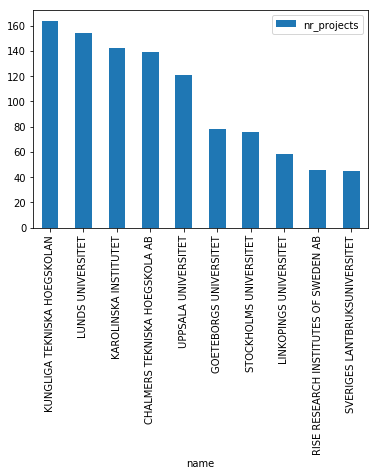

In [26]:
top_participants_by_country('SE', 10).plot(kind='bar')

In [27]:
top_participants_by_country('DE')

,nr_projects
name,
FRAUNHOFER GESELLSCHAFT ZUR FOERDERUNG DER ANGEWANDTEN FORSCHUNG E.V.,588
MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISSENSCHAFTEN EV,366
DEUTSCHES ZENTRUM FUER LUFT - UND RAUMFAHRT EV,229
KARLSRUHER INSTITUT FUER TECHNOLOGIE,168
TECHNISCHE UNIVERSITAET MUENCHEN,166
LUDWIG-MAXIMILIANS-UNIVERSITAET MUENCHEN,142
RHEINISCH-WESTFAELISCHE TECHNISCHE HOCHSCHULE AACHEN,140
TECHNISCHE UNIVERSITAET DRESDEN,127
FORSCHUNGSZENTRUM JULICH GMBH,114


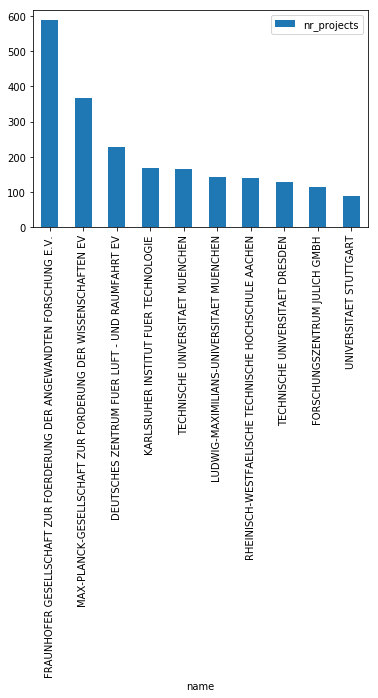

In [28]:
top_participants_by_country('DE', 10).plot(kind='bar')

In [29]:
df[df['country'] == 'SE'].groupby(['role']).agg({'projectID': 'count'})

,projectID
role,
beneficiary,6
coordinator,511
hostInstitution,23
participant,1840
partner,114


## Plot countries

In [30]:
import plotly.plotly as py
from iso3166 import countries as iso_c

### The data set has two lettered country code. For further analysis, we need iso3 values. The following function does that

In [31]:
def to_iso(row):
    country_code = row['country']
    
    if country_code == 'UK':
        country_code = 'GB'
    elif country_code == 'EL':
        country_code = 'GR'
    elif country_code == 'KO':
        country_code = 'KR'

    try:    
        iso_3 = iso_c.get(country_code).alpha3
        return iso_3
    except:
        print('Error {}'.format(country_code))
        return None

In [32]:
countries['iso3'] = countries.apply(to_iso, axis=1)

## Plot 
#### countries and projects

In [33]:
data = [ dict(
        type = 'choropleth',
        locations = countries['iso3'],
        z = countries['total'],
        text = countries['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Nr. of projects'),
      ) ]

layout = dict(
    title = 'Projects and countries',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='countries-projects-map' )

In [34]:
countries_mean = countries['total'].mean()
countries_mean

538.3333333333334

In [35]:
countries[countries['total'] >= countries['total'].mean()]

,country,total,iso3
0,UK,10134,GBR
1,DE,10095,DEU
2,ES,8235,ESP
3,IT,7591,ITA
4,FR,7426,FRA
5,NL,5224,NLD
6,BE,3727,BEL
7,SE,2494,SWE
8,EL,2332,GRC
9,AT,2252,AUT


#### Example:

> German institutes that were coordinators for projects

In [36]:
df[(df['role'] == 'coordinator') & (df['country'] == 'DE')] \
.groupby('name')['projectRcn'].count() \
.to_frame() \
.reset_index() \
.rename(columns={'projectRcn':'total'}) \
.sort_values(ascending=False, by='total') \
.head()

,name,total
349,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,149
171,FRAUNHOFER GESELLSCHAFT ZUR FOERDERUNG DER ANG...,90
339,LUDWIG-MAXIMILIANS-UNIVERSITAET MUENCHEN,74
111,DEUTSCHES ZENTRUM FUER LUFT - UND RAUMFAHRT EV,47
462,TECHNISCHE UNIVERSITAET MUENCHEN,42


### Top coordinators
> *CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS* - 290 projects

In [37]:
coordinators.groupby('name').count().reset_index() \
.rename(columns={'projectRcn':'total'}) \
.sort_values(ascending=False, by='total').head(50)

,name,total
876,CENTRE NATIONAL DE LA RECHERCHE SCIENTIFIQUE CNRS,290
4806,THE CHANCELLOR MASTERS AND SCHOLARS OF THE UNI...,262
2911,KOBENHAVNS UNIVERSITET,204
4808,"THE CHANCELLOR, MASTERS AND SCHOLARS OF THE UN...",177
5287,UNIVERSITY COLLEGE LONDON,168
3193,MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISS...,149
2423,IMPERIAL COLLEGE OF SCIENCE TECHNOLOGY AND MED...,148
139,AGENCIA ESTATAL CONSEJO SUPERIOR DEINVESTIGACI...,147
4852,THE UNIVERSITY OF BIRMINGHAM,117
1381,ECOLE POLYTECHNIQUE FEDERALE DE LAUSANNE,115


#### Coordinators and countries

In [38]:
coordinators_countries = df[df['role'] == 'coordinator'] \
.groupby('country')['name'] \
.count() \
.to_frame() \
.reset_index() \
.rename(columns={'name':'total'})

coordinators_countries['iso3'] = coordinators_countries.apply(to_iso, axis=1)
coordinators_countries.head()

,country,total,iso3
0,AI,1,AIA
1,AM,2,ARM
2,AT,419,AUT
3,BA,5,BIH
4,BE,610,BEL


## Plot

- coordinators and countries

In [39]:
data = [ dict(
        type = 'choropleth',
        locations = coordinators_countries['iso3'],
        z = coordinators_countries['total'],
        text = coordinators_countries['country'],
        colorscale = [[0,"rgb(5, 10, 172)"],[0.35,"rgb(40, 60, 190)"],[0.5,"rgb(70, 100, 245)"],\
            [0.6,"rgb(90, 120, 245)"],[0.7,"rgb(106, 137, 247)"],[1,"rgb(220, 220, 220)"]],
        autocolorscale = False,
        reversescale = True,
        marker = dict(
            line = dict (
                color = 'rgb(180,180,180)',
                width = 0.5
            ) ),
        colorbar = dict(
            autotick = False,
            tickprefix = '',
            title = 'Nr. of projects'),
      ) ]

layout = dict(
    title = 'Coordinators and countries',
    geo = dict(
        showframe = False,
        showcoastlines = False,
        projection = dict(
            type = 'Mercator'
        )
    )
)

fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='coordinators-countries-map' )

In [40]:
df[(df['role'] == 'coordinator')] \
.groupby(['country', 'name']) \
.agg({'projectRcn': 'count'}) \
.rename(columns={'projectRcn':'total'}) \
.sort_values(by='total', ascending=False) \
.groupby(['country']) \
.head(5).sort_values(by=['country'], ascending=True) \

total
country name                                                     
AI      OFFSHORE NAVIGATION LIMITED                             1
AM      SMALL AND MEDIUM ENTREPRENEURSHIP DEVELOPMENT N...      2
AT      TECHNISCHE UNIVERSITAET WIEN                           30
        Institute of Science and Technology Austria            30
        OESTERREICHISCHE AKADEMIE DER WISSENSCHAFTEN           15
        UNIVERSITAT WIEN                                       38
        UNIVERSITAET INNSBRUCK                                 15
BA      LIR EVOLUCIJA                                           1
        REPUBLICKA AGENCIJA ZA RAZVOJ MALIHI SREDNJIH P...      1
        VANJSKOTRGOVINSKA/SPOLJNOTRGOVINSKA KOMORA BIH          1
        TIDEA DOO BANJA LUKA                                    2
BE      INTERUNIVERSITAIR MICRO-ELECTRONICA CENTRUM            34
        VIB                                                    32
        UNIVERSITEIT ANTWERPEN                                 32
        UNIVERSITEIT GENT                                      60
        KATHOLIEKE UNIVERSITEIT LEUVEN                        115
BG      ARC CONSULTING EOOD                                     2
        INSTITUTE OF INFORMATION AND COMMUNICATION TECH...      2
        INSTITUTE OF MOLECULAR BIOLOGY AND BIOTECHNOLOGY        2
        ENERGY EFFICIENCY CENTER - ENEFFECTFOUNDATION           2
        SOFIISKI UNIVERSITET SVETI KLIMENT OHRIDSKI             3
CH      UNIVERSITAET BERN                                      30
        ECOLE POLYTECHNIQUE FEDERALE DE LAUSANNE              115
        EUROPEAN ORGANIZATION FOR NUCLEAR RESEARCH             27
        EIDGENOESSISCHE TECHNISCHE HOCHSCHULE ZUERICH          58
        UNIVERSITAT ZURICH                                     28
CY      THE CYPRUS INSTITUTE                                    7
        CY.R.I.C CYPRUS RESEARCH AND INNOVATION CENTER LTD      3
        UNIVERSITY OF CYPRUS                                   28
        TECHNOLOGIKO PANEPISTIMIO KYPROU                       10
...                                                           ...
SI      KMETIJSKI INSTITUT SLOVENIJE - AGRICULTURAL INS...      3
        UNIVERZA V MARIBORU, CENTER ZA UPORABNO MATEMAT...      2
        ACIES BIO BIOTEHNOLOSKE RAZISKAVE IN RAZVOJ DOO         4
        UNIVERZA V LJUBLJANI                                    9
        INSTITUT JOZEF STEFAN                                  17
SK      SLOVENSKA TECHNICKA UNIVERZITA V BRATISLAVE             2
        CENTRUM VEDECKO TECHNICKYCH INFORMACII SLOVENSK...      4
        SLOVENSKA ORGANIZACIA PRE VYSKUMNEA VYVOJOVE AK...      2
        UNIVERZITA KOMENSKEHO V BRATISLAVE                      4
        BIC BRATISLAVA SPOL SRO                                 3
TN      INSTITUT PASTEUR DE TUNIS                               1
        AGENCE DE PROMOTION DE L'INDUSTRIE ET DE L'INNO...      1
TR      KOC UNIVERSITY                                         16
        Bilkent ‹niversitesi                                    9
        ISTANBUL TEKNIK UNIVERSITESI                            7
        MIDDLE EAST TECHNICAL UNIVERSITY                        4
        KOSGEB-KUCUK VE ORTA OLCEKLI ISLETMELERI GELIST...     10
UA      INSTITUTE OF PHYSICS OF NATIONAL ACADEMY OF SCI...      2
        LVIV POLYTECHNIC NATIONAL UNIVERSITY                    1
        LIMITED LIABILITY COMPANY POLYTEDA CLOUD                1
        LIMITED LIABILITY COMPANY INTEGRO-SD                    1
        JOINT STOCK COMPANY NVO CHERNOVA HUILYA                 1
UK      THE UNIVERSITY OF BIRMINGHAM                          117
        IMPERIAL COLLEGE OF SCIENCE TECHNOLOGY AND MEDI...    148
        UNIVERSITY COLLEGE LONDON                             168
        THE CHANCELLOR, MASTERS AND SCHOLARS OF THE UNI...    177
        THE CHANCELLOR MASTERS AND SCHOLARS OF THE UNIV...    262
US      NET ESOLUTIONS CORPORATION                              1
UY      COOPERACION LATINOAMERICAN

### Top participants and countries

In [41]:
countries_participants = df.groupby(['country', 'name']) \
.agg({'projectID': [('nr_projects', 'count')]}) \

countries_participants.columns = countries_participants.columns.droplevel()

def get_top_participants_by_countries(countries=[['SE', 'DE', 'NO']], is_asc=False, limit=5):
    res_df = countries_participants.sort_values(ascending=[True, is_asc], by=['country', 'nr_projects']).groupby(['country']).head(limit)
        
    return res_df.loc[countries]        

> Example

In [42]:
get_top_participants_by_countries(countries=['SE', 'DE', 'NO'], is_asc=False, limit=10)

nr_projects
country name                                                           
DE      FRAUNHOFER GESELLSCHAFT ZUR FOERDERUNG DER ANGE...          588
        MAX-PLANCK-GESELLSCHAFT ZUR FORDERUNG DER WISSE...          366
        DEUTSCHES ZENTRUM FUER LUFT - UND RAUMFAHRT EV              229
        KARLSRUHER INSTITUT FUER TECHNOLOGIE                        168
        TECHNISCHE UNIVERSITAET MUENCHEN                            166
        LUDWIG-MAXIMILIANS-UNIVERSITAET MUENCHEN                    142
        RHEINISCH-WESTFAELISCHE TECHNISCHE HOCHSCHULE A...          140
        TECHNISCHE UNIVERSITAET DRESDEN                             127
        FORSCHUNGSZENTRUM JULICH GMBH                               114
        UNIVERSITAET STUTTGART                                       88
NO      STIFTELSEN SINTEF                                           107
        UNIVERSITETET I OSLO                                        102
        NORGES TEKNISK-NATURVITENSKAPELIGE UNIVERSITET ...          101
        UNIVERSITETET I BERGEN                                       83
        NORGES FORSKNINGSRAD                                         54
        SINTEF AS                                                    48
        UNIVERSITETET I TROMSOE                                      29
        OSLO UNIVERSITETSSYKEHUS HF                                  21
        NIBIO - NORSK INSTITUTT FOR BIOOKONOMI                       18
        OSLOMET - STORBYUNIVERSITETET                                16
SE      KUNGLIGA TEKNISKA HOEGSKOLAN                                164
        LUNDS UNIVERSITET                                           154
        KAROLINSKA INSTITUTET                                       142
        CHALMERS TEKNISKA HOEGSKOLA AB                              139
        UPPSALA UNIVERSITET                                         121
        GOETEBORGS UNIVERSITET                                       78
        STOCKHOLMS UNIVERSITET                                       76
        LINKOPINGS UNIVERSITET                                       58
        RISE RESEARCH INSTITUTES OF SWEDEN AB                        46
        SVERIGES LANTBRUKSUNIVERSITET                                45